# Clean and Analyze Employee Exit Surveys

In this project, I'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The results for both surveys will be combined to answer the following questions:

   * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
   * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



# Introduction
First, I'll read in the datasets and do some initial exporation

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')



In [2]:
#Quick exploration of the dete_survey data
print(dete_survey.info())
dete_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#Quick exploration of the tafe_survey data

print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4



I can make the following observations based from the exploration done above:

   * The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
   * Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
   * Each dataframe contains many of the same columns, but the column names are different.
   * There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identify Missing Values and Drop Unneccessary Columns

First, I'll correct the Not Stated values and drop some of the columns I don't need for my analysis.


In [4]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Quick exploration of the data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop the columns I don't need for analysis

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#check that the columns were dropped and see the remaining columns
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Renaming the Columns
Next, I'll standardize the names of the columns I want to work with, because eventually the dataframes will be combined

In [6]:
#clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

#check that the column names were updated correctly
print(dete_survey_updated.columns)

#quick exploration to see the changes
dete_survey_updated.head()

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
#update column names to match with the names in dete_survey_updated
mapping = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

#check that the specified columns were uodated correctly
print(tafe_survey_updated.columns)

#quick exploration to see the changes
tafe_survey_updated.head()

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering the Data
For this project, only survey respondents who resigned will be analysed, so I'll only select separation types containing the string 'Resignation'

In [8]:
#check for the unique values in the separation type column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
#check for the unique values in the separation type column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
# Select only the resignation separation types from each dataframe

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] =='Resignation'].copy()

## Verifying the Data

Below, I clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. I'll use the following criteria:

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [11]:
#check the unique values
print(dete_resignations['cease_date'].value_counts())

#Extract the years and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64


In [12]:
#check the unique values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [13]:
#check the unique value and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values(ascending=False)

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1990.0     5
1993.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1976.0     2
1983.0     2
1974.0     2
1982.0     1
1973.0     1
1975.0     1
1987.0     1
1977.0     1
1984.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [14]:
#chek the unique values and look for outliers
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Below are the findings:

* The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since I'm not concerned with analyzing the results by year, I'll leave them as is.

## Create a New Column
Since the end goal is to answer the question below, I need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

* End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The tafe_resignations dataframe already contains a "service" column, which was renamed to institute_service.

Below, I calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [15]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


#quick check for the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

Next, I'll identify any employees who resigned because they were dissatisfied. Below are the columns I'll use to categorize employees as "dissatisfied" from each dataframe:

   * tafe_survey_updated:
     * Contributing Factors. Dissatisfaction
     * Contributing Factors. Job Dissatisfaction
   * dafe_survey_updated:
       * job_dissatisfaction
       * dissatisfaction_with_the_department
       * physical_work_environment
       * lack_of_recognition
       * lack_of_job_security
       * work_location
       * employment_conditions
       * work_life_balance
       * workload

If the employee indicated any of the factors above caused them to resign, I'll mark them as dissatisfied in a new column. After the changes, the new dissatisfied column will contain just the following values:

   * True: indicates a person resigned because they were dissatisfied in some way
   * False: indicates a person resigned because of a reason other than dissatisfaction with the job
   * NaN: indicates the value is missing


In [16]:
#check unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [17]:
#check unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
# Update the values in the contributing factors columns to be either True, False, or NaN

def  update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [19]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

Below, I'll add an institute column so that I can differentiate the data from each survey after I combine them. Then, will combine the dataframes and drop any remaining columns I don't need.


In [20]:
#add the institute column for easy diffrentiation between dataframes
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


#combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [21]:
# Drop columns with less than 300 non-null values

combined_updated = combined.dropna(thresh=300, axis=1).copy()

## Clean the Service Column

Next, I'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

The analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [22]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [23]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [24]:
# convert years of service to categories
def change_service(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return 'Established'
    elif 3 <= val < 7:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'
    
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(change_service)

# quick check for the unique values in the new column
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform the First Analysis - Service
Finally, I'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since there are still additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

Note that df.pivot_table() treat boolean values as integers: True=1, False=0, therefore calculating the mean which is the default aggfunc parameter of the pivot_table, will also calculate the percentage of the dissatisfied employees

In [25]:
#check for the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
# Replace missing values with the most frequent value, False

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

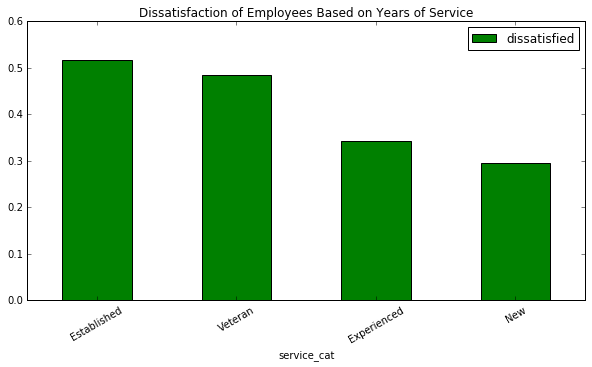

In [27]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
dis_pct = dis_pct.sort_values(by='dissatisfied', ascending=False)

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30, color='green', figsize=(10,5), title='Dissatisfaction of Employees Based on Years of Service')

From the initial analysis above, it can be tentatively concluded that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, I need to handle the rest of the missing data to finalize the analysis


Then, lets figure out employees under which of the given positions were most dissatisfied of all.

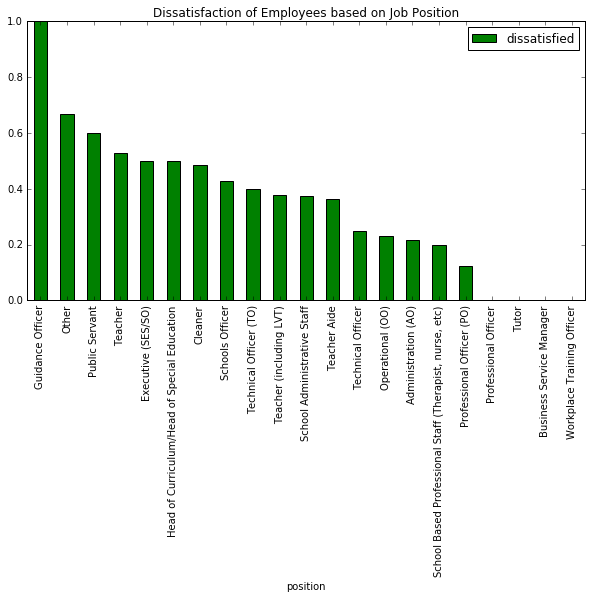

In [28]:
## create a pivot table which displays dissatisfation
#  by job position in the combined_updates

dis_pct = combined_updated.pivot_table(index='position', values="dissatisfied")
dis_pct = dis_pct.reindex(dis_pct['dissatisfied'].sort_values(ascending=False).index)


%matplotlib inline
dis_pct.plot(kind='bar', color="green", figsize=(10,5), title='Dissatisfaction of Employees based on Job Position')


From the above plot, it can be observed that employees who were Guidance Officers were the most dissatisfied with the job. Business Service Managers, Tutors and Workplace Training Officers showed no dissatisfaction, as per the data above.

## Cleaning the Age Column

Next, I'll clean the age column and categorize employees according to the following definitions:

   * 20's: employees between the age of 20-29
   * 30's: employees between the age of 30-39
   * 40's: employees between the age of 40-49
   * 50's: employees between the age of 50-59
   * 60's: employees between the age of 60-69


In [29]:
# check for the unique values
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [30]:
# Extract the age and convert the type to float
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype('float')

# Check the age extracted are correct
combined_updated['age'].value_counts().sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
Name: age, dtype: int64

In [31]:
#convert age to categories

def change_age(val):
    if pd.isnull(val):
        return np.nan
    elif 20 <= val <= 29:
        return "20's"
    elif 30 <= val <= 39:
        return "30's"
    elif 40 <= val <= 49:
        return "40's"
    elif 50 <= val <= 59:
        return "50's"
    else:
        return "60's"
    
combined_updated['age_cat'] = combined_updated['age'].apply(change_age)

# quick check for the update
combined_updated['age_cat'].value_counts()

40's    174
20's    139
30's    134
50's    126
60's     23
Name: age_cat, dtype: int64

## Perform the Second Analysis - Age
Here, I'll calculate the percentage of employees who resigned due to dissatisfaction in each age_cat group and plot the results. 

Note that df.pivot_table() treat boolean values as integers: True=1, False=0, therefore calculating the mean which is the default aggfunc parameter of the pivot_table, will also calculate the percentage of the dissatisfied employees

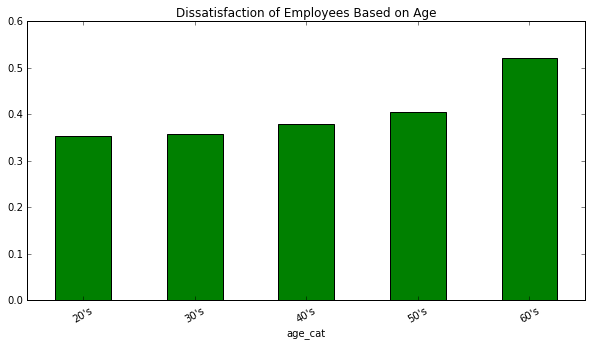

In [32]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each age category
age_pct = combined_updated.pivot_table(values='dissatisfied', index='age_cat')




# Plot the results
%matplotlib inline
age_pct.plot(kind='bar', rot=30, color='green', figsize=(10,5), legend=False, title='Dissatisfaction of Employees Based on Age' )

Finally, from the above plot, it can be concluded that employees who are older(60's) are more likely to resign due to some kind of dissatisfaction with the job (this might be beause they are nearing retirement) than employees who are in their 20's and 30's(this might be because they are at the beginning of their career).




###### To analyse even further, let's find the dissatisfaction levels by gender and age group.

In [33]:
combined_updated['gender'].value_counts()

Female    424
Male      168
Name: gender, dtype: int64

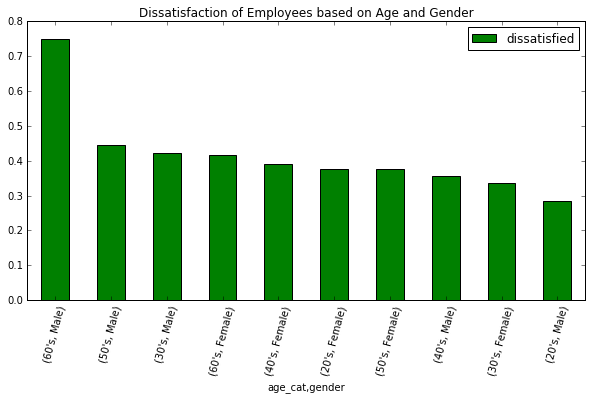

In [34]:
age_gender = combined_updated.pivot_table(values=['dissatisfied'], index=['age_cat','gender'])
age_gender = age_gender.sort_values(ascending=False, by='dissatisfied')

#plot
%matplotlib inline
age_gender.plot(kind='bar', rot=75, figsize=(10,5), color='green', title='Dissatisfaction of Employees based on Age and Gender')


Clearly, 75% of the male employees aged above 60 years resigned because of some kind of dissatisfaction at work, followed by 45% of male with the age group of 50-59.

## Perform Third Analysis - Institute

Let's analyse and find out employees of what institute mostly resigned due to some kind of dissatisfaction.

To proceed, to first check the institute column and it's values.

In [35]:
# quick check for the unique values

combined_updated['institute'].value_counts(dropna=False)

TAFE    340
DETE    311
Name: institute, dtype: int64

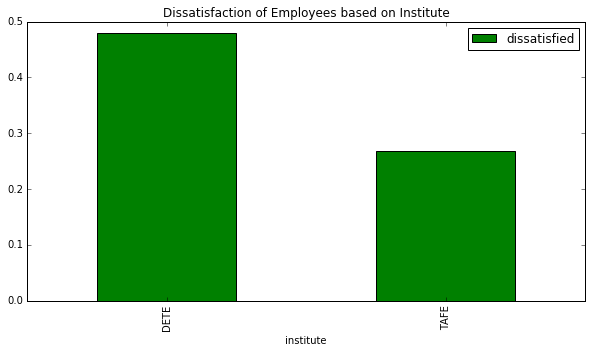

In [36]:
institute_pct = combined_updated.pivot_table(index='institute', values='dissatisfied')

#plot
%matplotlib inline
institute_pct.plot(kind='bar', figsize=(10,5), color='green', title='Dissatisfaction of Employees based on Institute')



From a glance at the chart above, it shows that higher number of employees in DETE institute resigned due to dissatisfaction of some kind. However, recall that the factors leading to resignation due to dissatisfaction in DETE were more than those considered for TAFE, and are as follows:

dete_resignations:

   * job_dissatisfaction
   * dissatisfaction_with_the_department
   * physical_work_environment
   * lack_of_recognition
   * lack_of_job_security
   * work_location
   * employment_conditions
   * work_life_balance
   * workload

tafe_resignations:

   * Contributing Factors. Dissatisfaction
   * Contributing Factors. Job Dissatisfaction

Since there are more factors to dissatisfaction in DETE, the survey results in the above chart represents resignation due to dissatisfation employees in DETE institute.


###### Let's check out dissatisfaction due to years of service and age

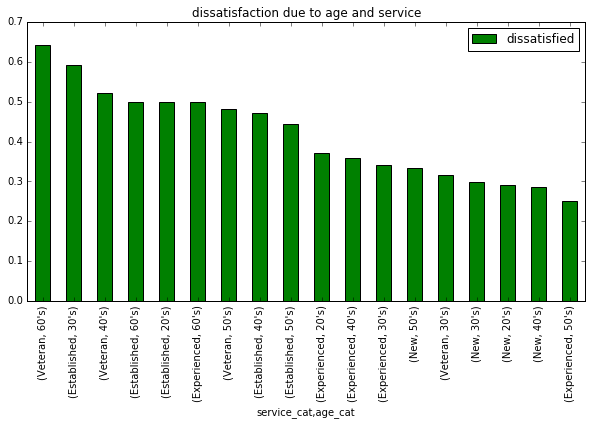

In [37]:
age_service = combined_updated.pivot_table(index=['service_cat','age_cat'], values='dissatisfied')
age_service = age_service.sort_values(by='dissatisfied', ascending=False)

#plot
%matplotlib inline
age_service.plot(kind='bar', color='green', figsize=(10,5), title='dissatisfaction due to age and service')

Almost 60% of the Established employees within the age group 30-39 with 7 to 10 years of experience, 64% of Veterans with 11 or more years of experience aged above 60, reported more dissatisfation during their exit survery. Also, taking a closer look at the data shows that we can say that employees who have been employed at the institutes for more than 7 years were more likely to resign due to some kind of dissatisfaction.

## Final Analysis - Resignation due to some kind of dissatisfaction

Here, I will analyse how many people in each career stage resigned due to some kind of dissatisfaction. Then, will consider the dissatisfaction factors considered under DETE institute which are the following columns: job_dissatisfaction,dissatisfaction_with_the_department,
physical_work_environment,lack_of_recognition,lack_of_job_security,
work_location,employment_conditions, work_life_balance,workload;
And will consider the Contributing factor. Job dissatisfaction and Contributing factor. Dissatisfaction, under the TAFE institute.

To proceed, firstly find the missing values, clean them and then aggregate them with service_cat column.


In [38]:
#check the missing values
print('Values in the Job Dissatisfaction column before cleaning\n', combined_updated['job_dissatisfaction'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["job_dissatisfaction"] = combined_updated["job_dissatisfaction"].fillna(False)

combined_updated["job_dissatisfaction"].value_counts(dropna=False)

Values in the Job Dissatisfaction column before cleaning
 NaN      340
False    270
True      41
Name: job_dissatisfaction, dtype: int64


False    610
True      41
Name: job_dissatisfaction, dtype: int64

In [39]:
#check the missing values
print('Values in the Dissatisfaction with the department column before cleaning\n', combined_updated['dissatisfaction_with_the_department'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["dissatisfaction_with_the_department"] = combined_updated["dissatisfaction_with_the_department"].fillna(False)

combined_updated["dissatisfaction_with_the_department"].value_counts(dropna=False)

Values in the Dissatisfaction with the department column before cleaning
 NaN      340
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    622
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [40]:
#check the missing values
print('Values in the Physical work environment column before cleaning\n', combined_updated['physical_work_environment'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["physical_work_environment"] = combined_updated["physical_work_environment"].fillna(False)

combined_updated["physical_work_environment"].value_counts(dropna=False)

Values in the Physical work environment column before cleaning
 NaN      340
False    305
True       6
Name: physical_work_environment, dtype: int64


False    645
True       6
Name: physical_work_environment, dtype: int64

In [41]:
#check the missing values
print('Values in the lack of recognition column before cleaning\n', combined_updated['lack_of_recognition'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["lack_of_recognition"] = combined_updated["lack_of_recognition"].fillna(False)

combined_updated["lack_of_recognition"].value_counts(dropna=False)

Values in the lack of recognition column before cleaning
 NaN      340
False    278
True      33
Name: lack_of_recognition, dtype: int64


False    618
True      33
Name: lack_of_recognition, dtype: int64

In [42]:
#check the missing values
print('Values in the lack of job security column before cleaning\n', combined_updated['lack_of_job_security'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["lack_of_job_security"] = combined_updated["lack_of_job_security"].fillna(False)

combined_updated["lack_of_job_security"].value_counts(dropna=False)

Values in the lack of job security column before cleaning
 NaN      340
False    297
True      14
Name: lack_of_job_security, dtype: int64


False    637
True      14
Name: lack_of_job_security, dtype: int64

In [43]:
#check the missing values
print('Values in the work location column before cleaning\n', combined_updated['work_location'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["work_location"] = combined_updated["work_location"].fillna(False)

combined_updated["work_location"].value_counts(dropna=False)

Values in the work location column before cleaning
 NaN      340
False    293
True      18
Name: work_location, dtype: int64


False    633
True      18
Name: work_location, dtype: int64

In [44]:
#check the missing values
print('Values in the employment conditions column before cleaning\n', combined_updated['employment_conditions'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["employment_conditions"] = combined_updated["employment_conditions"].fillna(False)

combined_updated["employment_conditions"].value_counts(dropna=False)

Values in the employment conditions column before cleaning
 NaN      340
False    288
True      23
Name: employment_conditions, dtype: int64


False    628
True      23
Name: employment_conditions, dtype: int64

In [45]:
#check the missing values
print('Values in the work life balance column before cleaning\n', combined_updated['work_life_balance'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["work_life_balance"] = combined_updated["work_life_balance"].fillna(False)

combined_updated["work_life_balance"].value_counts(dropna=False)

Values in the work life balance column before cleaning
 NaN      340
False    243
True      68
Name: work_life_balance, dtype: int64


False    583
True      68
Name: work_life_balance, dtype: int64

In [46]:
#check the missing values
print('Values in the workload column before cleaning\n', combined_updated['workload'].value_counts(dropna=False))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated["workload"] = combined_updated["workload"].fillna(False)

combined_updated["workload"].value_counts(dropna=False)

Values in the workload column before cleaning
 NaN      340
False    284
True      27
Name: workload, dtype: int64


False    624
True      27
Name: workload, dtype: int64

In [47]:
#  Contributing Factors. Job Dissatisfaction - TAFE and
#  Contributing Factor. Dissatisfaction - TAFE
print(" \n\nMissing values in Contributing Factors. Job Dissatisfaction\n",combined_updated["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))
print(" \n\nMissing values in Contributing Factors. Dissatisfaction\n",combined_updated["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))

# update the missing values using the `update_vals()` function created earlier
combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = (

combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']]
    .applymap(update_vals))

# replace missing values with value 
# that occurs most frequently in this column
combined_updated['Contributing Factors. Job Dissatisfaction'] = combined_updated["Contributing Factors. Job Dissatisfaction"].fillna(False)
 
combined_updated['Contributing Factors. Dissatisfaction'] = combined_updated["Contributing Factors. Dissatisfaction"].fillna(False)
 
# check the values
print('\n\n Cleaned column Contributing Factors. Job Dissatisfaction \n')
print(combined_updated['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
print('\n\n Cleaned column Contributing Factors. Dissatisfaction \n')
print(combined_updated['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

 

Missing values in Contributing Factors. Job Dissatisfaction
 NaN                    319
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
 

Missing values in Contributing Factors. Dissatisfaction
 NaN                                       319
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


 Cleaned column Contributing Factors. Job Dissatisfaction 

False    589
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


 Cleaned column Contributing Factors. Dissatisfaction 

False    596
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


Columns Contributing Factors. Job Dissatisfaction and job_dissatisfaction represent job dissatisfaction in TAFE and DETE institutes respectively. We can combine both to on single column and proceed with our analysis

In [48]:
combined_updated["DETE-TAFE Combined job_dissatisfaction"] = combined_updated[['job_dissatisfaction',
        'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
 
combined_updated["DETE-TAFE Combined job_dissatisfaction"].value_counts()

False    548
True     103
Name: DETE-TAFE Combined job_dissatisfaction, dtype: int64

Now that the dissatisfaction columns have been cleaned with the missing values, I'll aggregate by service_cat and analyse the results

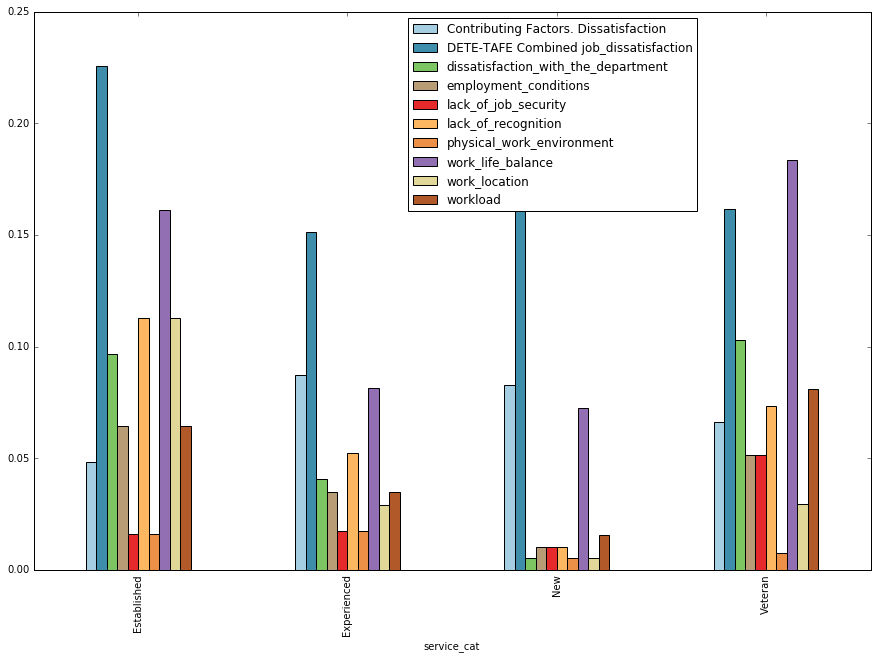

In [49]:
cols=[ 'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload','DETE-TAFE Combined job_dissatisfaction','Contributing Factors. Dissatisfaction']

dissatisfaction_result = combined_updated.pivot_table(index='service_cat', values=cols)

#plot
%matplotlib inline
dissatisfaction_result.plot(kind='bar', figsize=(15,10), colormap='Paired').legend(bbox_to_anchor=(0.8, 1))

The chart above shows the results of aggregation of dissatisfaction factors among the employees in DETE and TAFE institutes by service category.

From the plot, it is observed that lack of work-life balance is one of the major reasons for dissatisfaction with the job that 18% of Established employees in DETE and the DETE_TAFE Combined job dissatisfaction factor is one of the major reasons for dissatisfaction with the job in all service categories.

# Conclusion

In this project I analysed the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia to figure out the reason for resignation being dissatisfaction of some kind among the employees.

We can conclude that employees who have worked longer in the institutes were prone to resign due to some kind of dissatisfaction than those who worked for shorter periods of time. About 30% of the new employees and more than 50% of the established employees resigned due to some dissatisfaction.

It is also notable that employees who were older ie, above the age of 60 and those between 50 and 59 years of age citied more dissatisfaction. 